# 7 Practical: Confidence Intervals

In this practical you will

- Explore the effect of sample size on confidence intervals
- Explore how confidence intervals change when the level changes
- Obtain confidence intervals for a mean, a difference in means and (optional) a proportion
- (optional) Explore how to obtain bootstrap confidence intervals

We will use the mother and baby dataset.

## Confidence Intervals and Reference Ranges

Use the following code to open the mother and baby dataset

In [ ]:
# Open mother-baby data
baby <- read.csv("baby.csv", sep=",")

**Question 1.** 

i. In this question, we will consider the birth weight variable from the mother-baby dataset. Summarise and plot the variable. What does the distribution look like? Are there any missing values or outliers? 

In [ ]:
# Calculations here

ii. Obtain the sample standard deviation. Use this to calculate an approximate 95% reference range for baby birth weights in this population (a range within which 95% of baby's birth weights will lie). 


In [ ]:
# Calculations here

iii. Calculate the standard error of the mean birth weight. Use this to calculate a 95% confidence interval for the population mean birthweight. Compare the reference range to the confidence interval. Which is wider? 

In [ ]:
# Calculations here

iv. Repeat the above questions in the subset of mother-baby pairs where the mother smoked. You may want to create a data frame containing only these mother-baby pairs, e.g. using the command:  babysmall <- baby[baby$Maternal.Smoker, ].  In this smaller sample of data, how have the following changed (and why?): the sample mean, the sample standard deviation, the estimated standard error, the 95% reference range, and the 95% confidence interval.

In [ ]:
# Calculations here

## Levels of confidence intervals

**Question 2.**  

The following code calculates a 95% confidence interval for a mean. The last option tells R which level of confidence you wish.

In [11]:
t.test(baby$Birth.Weight, data=baby, conf.level = 0.95)


	One Sample t-test

data:  baby$Birth.Weight
t = 223.32, df = 1173, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 118.413 120.512
sample estimates:
mean of x 
 119.4625 


i. Use the code to obtain a 95% confidence interval. Check that it agrees with your manual calculation above. [Note: Only the bottom half of the output is relevant to this session.]

ii. Obtain a 99% confidence interval. Look at a range of levels (e.g. 80%, 99.99%) and see how the intervals change. 

[If you have problems making the code work, use the manual approach:  Sample mean $\pm M \times SE$ where $SE$ is the standard error and $M= 1.282, 1.96, 2.58, 3.90$ for 80%, 95%, 99%, 99.99% confidence intervals, respectively]

In [ ]:
# Confidence intervals of different levels here:

# Exploring different confidence intervals

**Question 3.** 

i. Now we will compare the birth weight of babies born to mothers who smokerd and those who did not. How many mother-baby pairs are in each of those groups? Calculate the difference in sample means. Which group has the higher observed mean birthweight? 

Use the code below to obtain a 95% confidence interval for the difference in means. Interpret the confidence interval.

In [19]:
t.test(baby$Birth.Weight ~ baby$Maternal.Smoker, data=baby, conf.level = 0.95)


	Welch Two Sample t-test

data:  baby$Birth.Weight by baby$Maternal.Smoker
t = 8.6265, df = 941.81, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  7.158132 11.374153
sample estimates:
mean in group False  mean in group True 
           123.0853            113.8192 


ii. [Optional]  Using the formula in the notes, manually calculate a 95% confidence interval for the proportion of mothers who smoke. Then fill in the numbers A (number of "successes" and B (number of Bernoulli trials) below to run the code. This will provide three different confidence intervals for the proportion. How much do the different confidence intervals differ?  

In [18]:
binom.test(A, B,
           0.5,
           alternative="two.sided",
           conf.level=0.95)

prop.test(A, B, p = NULL,
          alternative = "two.sided",
          conf.level = 0.95, correct = TRUE)

prop.test(A, B, p = NULL,
          alternative = "two.sided",
          conf.level = 0.95, correct = FALSE)

[1] 0.3773502

[1] 0.4045919


	Exact binomial test

data:  459 and 1174
number of successes = 459, number of trials = 1174, p-value = 7.928e-14
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.3629351 0.4195547
sample estimates:
probability of success 
              0.390971 



	1-sample proportions test with continuity correction

data:  459 out of 1174, null probability 0.5
X-squared = 55.388, df = 1, p-value = 9.896e-14
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.3630379 0.4196262
sample estimates:
       p 
0.390971 



	1-sample proportions test without continuity correction

data:  459 out of 1174, null probability 0.5
X-squared = 55.823, df = 1, p-value = 7.931e-14
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.3634570 0.4191963
sample estimates:
       p 
0.390971 


iii. [Optional] Using the code below, draw 1000 bootstrap samples, calculate the mean birth weight in each sample and obtain the 95% percentile confidence interval. Compare the interval to the one you calculated in the first question. Are they similar? Why / why not? 

[1] 119.4702

[1] 0.5041817

2.5%    97.5% 
118.4608 120.5010

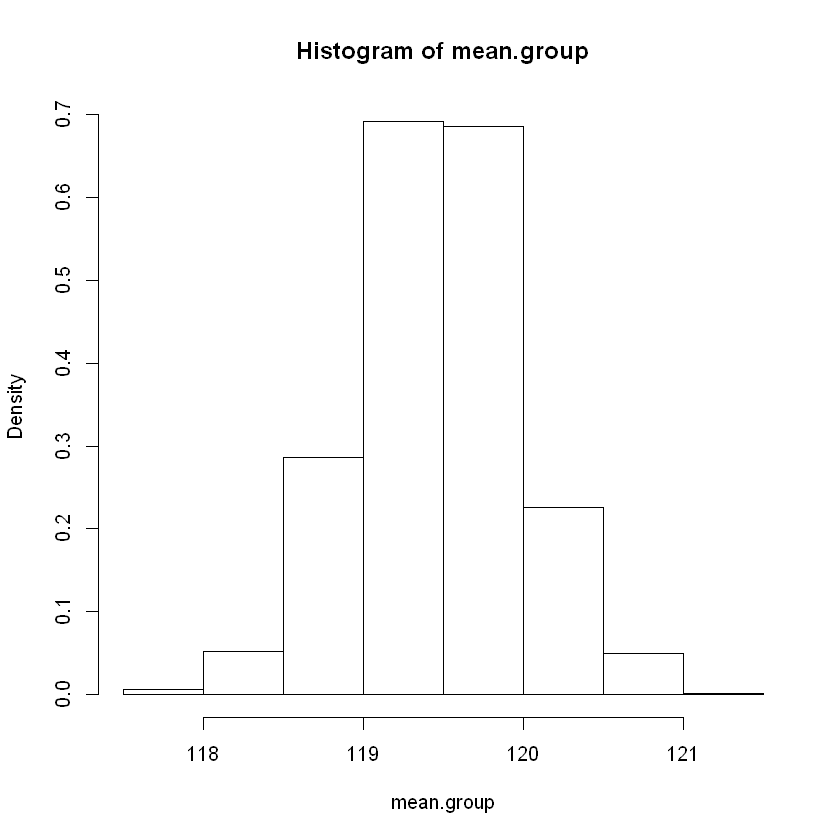

In [16]:
# Set the seed
set.seed(1234)

# Draw bootstrap samples
bootstrap <- lapply(1:NUMBER_HERE, function(i) sample(baby$Birth.Weight, replace = T))

# Calculate sample means in each bootstrap sample
mean.group <- sapply(bootstrap, mean)

# Some summary statistics
mean(mean.group)
sqrt(var(mean.group))
                     
# Draw a histogram
hist(mean.group, freq=FALSE)

# Print out the 2.5th and 97.5th percentiles
quantile(mean.group, c(0.025, 0.975))